Numerical solution to bethe ansatz method

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import cmath as cm

In [76]:
J=1
U=5*J
ω=0
L=101 #Impar


In [77]:
def yRe(pR,pI, P, n, k):
    i=complex(0,1)
    p=np.zeros(len(pR), dtype=complex)
    p=pR+i*pI
    #p=complex(pR, pI)
    #i=complex(0,1)
    #subalg=-(U-4*i*J*cm.cos(P/2)*cm.sin(p))/(U+4*i*J*cm.cos(P/2)*cm.sin(p))-(-1)**n*cm.exp(i*p*(L+1))
    subalg=-(U-4*i*J*np.cos(P/2)*np.sin(p, dtype=complex))/(U+4*i*J*np.cos(P/2)*np.sin(p, dtype=complex))-(-1)**n*np.exp(i*p*(L))
    return subalg.real

def yReS(pR, P, n, k):
    i=complex(0,1)
    #p=np.zeros(len(pR), dtype=complex)
    #p=pR+i*pI
    p=pR
    #p=complex(pR, pI)
    #i=complex(0,1)
    #subalg=-(U-4*i*J*cm.cos(P/2)*cm.sin(p))/(U+4*i*J*cm.cos(P/2)*cm.sin(p))-(-1)**n*cm.exp(i*p*(L+1))
    #print(np.angle(-(U-4*i*J*np.cos(P/2)*np.sin(p))/(U+4*i*J*np.cos(P/2)*np.sin(p)))-np.arctan2(4* J * np.cos(P/2)*np.sin(p), -U)+np.arctan2(4* J * np.cos(P/2)*np.sin(p), U) )
    if n%2==0:
        subalg=np.arctan(-4* J * np.cos(P/2)*np.sin(p)/U)-np.arctan(4* J * np.cos(P/2)*np.sin(p)/U)-p*L+2*k*np.pi+np.pi
    else:
        subalg=np.arctan(-4* J * np.cos(P/2)*np.sin(p)/U)-np.arctan(4* J * np.cos(P/2)*np.sin(p)/U)-p*L+2*k*np.pi
    return subalg

"""def yReS(pR, P, n, k):
    i=complex(0,1)
    #p=np.zeros(len(pI), dtype=complex)
    #p=i*pI
    p=pR[0]+i*pR[1]
    
    #subalg=-(U-4*i*J*cm.cos(P/2)*cm.sin(p))/(U+4*i*J*cm.cos(P/2)*cm.sin(p))-(-1)**n*cm.exp(i*p*(L+1))
    #subalg=i*p*(L+1)+(n-1)*np.pi+ 2*i*np.arctanh(4*J*np.cos(P/2)*np.sinh(p)/U)
    subalg=-(U-4*i*J*np.cos(P/2)*np.sin(p, dtype=complex))/(U+4*i*J*np.cos(P/2)*np.sin(p, dtype=complex))-(-1)**n*np.exp(i*p*(L), dtype=complex)
    return subalg.real, subalg.imag"""

def yIm(pR,pI, P, n):
    i=complex(0,1)
    p=np.zeros(len(pR), dtype=complex)
    p=pR+i*pI
    #p=complex(pR, pI)
    
    #subalg=-(U-4*i*J*cm.cos(P/2)*cm.sin(p))/(U+4*i*J*cm.cos(P/2)*cm.sin(p))-(-1)**n*cm.exp(i*p*(L+1))
    #subalg=i*p*(L+1)+(n-1)*np.pi+ 2*i*np.arctanh(4*J*np.cos(P/2)*np.sinh(p)/U)
    subalg=-(U-4*i*J*np.cos(P/2)*np.sin(p, dtype=complex))/(U+4*i*J*np.cos(P/2)*np.sin(p, dtype=complex))-(-1)**n*np.exp(i*p*(L))
    return subalg.imag

def yImS(pI, P, n):
    i=complex(0,1)
    #p=np.zeros(len(pI), dtype=complex)
    #p=i*pI
    p=pI[0]+i*pI[1]
    
    #subalg=-(U-4*i*J*cm.cos(P/2)*cm.sin(p))/(U+4*i*J*cm.cos(P/2)*cm.sin(p))-(-1)**n*cm.exp(i*p*(L+1))
    #subalg=i*p*(L+1)+(n-1)*np.pi+ 2*i*np.arctanh(4*J*np.cos(P/2)*np.sinh(p)/U)
    subalg=-(U-4*i*J*np.cos(P/2)*np.sin(p, dtype=complex))/(U+4*i*J*np.cos(P/2)*np.sin(p, dtype=complex))-(-1)**n*np.exp(i*p*(L))
    return subalg.real, subalg.imag
def y(p, P, n):
    p=complex(p[0], p[1])
    i=complex(0,1)
    subalg=-(U-4*i*J*cm.cos(P/2)*cm.sin(p))/(U+4*i*J*cm.cos(P/2)*cm.sin(p))-(-1)**n*cm.exp(i*p*(L+1))
    return [(subalg.real), (subalg.imag)]

In [78]:
i=complex(0,1)
n=np.arange(1,L+1, 1)
P_n=np.zeros(L)
#arrayweights=np.arange(0, L/2, 1)
EDoublon=np.zeros(L)
pDoublon=np.zeros((L, 2))
EScatt=np.zeros((int(L), int((L-1)/2)))
pScatt=np.zeros((int(L), int((L-1)/2)))
aux=np.ones(L)
for j in range(L):
    P_n[j]=2*np.pi*n[j]/(L)
for j in range(L):
    if j==42:
        auxI=fsolve(yImS, x0=[-0.5, 2.5], args=(P_n[j], n[j]))
    else:
        if j==49:
            auxI=fsolve(yImS, x0=[-0.5, 5], args=(P_n[j], n[j]))
        else:
            auxI=fsolve(yImS, x0=[-0.5, 1.6], args=(P_n[j], n[j]))
    pDoublon[j, 0]=auxI[0]
    pDoublon[j, 1]=auxI[1]
    auxI=auxI[0]+i*auxI[1]
    EDoublon[j]=2*ω+(-4*J*np.cos((P_n[j])/2)*np.cos(auxI, dtype=complex))
    for k in range(int((L-1)/2)):
        auxR=fsolve(yReS, x0=[aux[j]], args=(P_n[j], n[j], k))
        auxR=auxR[0]
        EScatt[j, k]=2*ω+(-4*J*np.cos(P_n[j]/2)*np.cos(auxR))
        pScatt[j, k]=auxR

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


In [79]:
print(j, k)

100 49


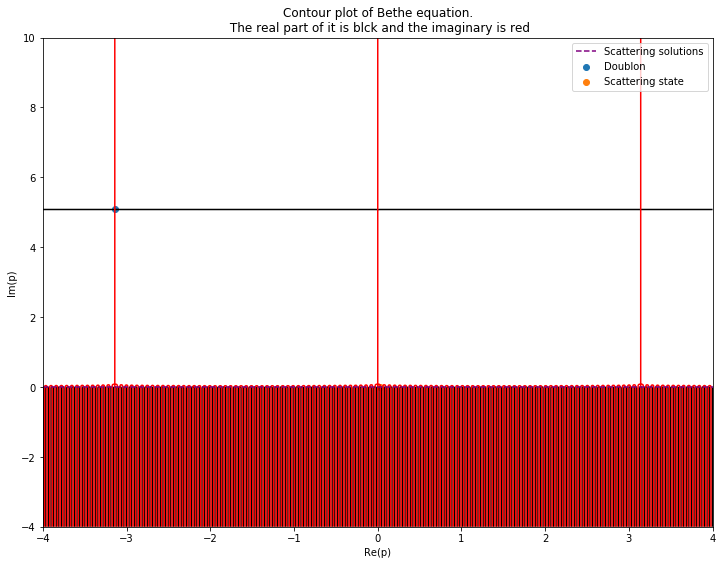

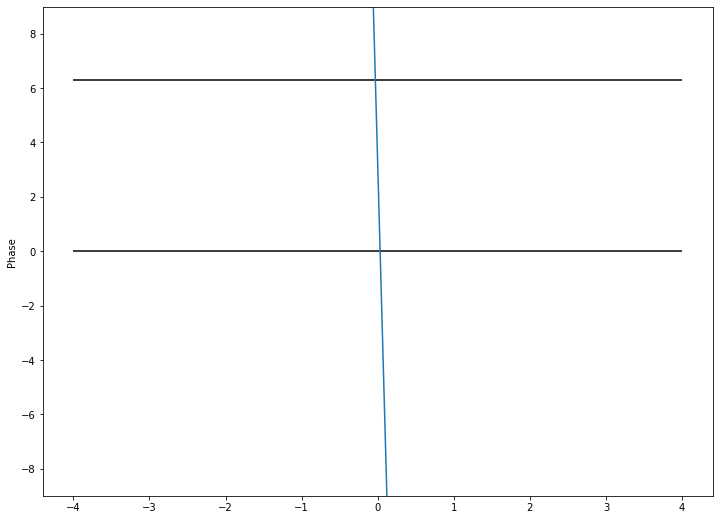

In [80]:
i_Solution=49
plt.figure(figsize=[12,9])
RealAx=np.linspace(-4, 4, 1000)
ImAx=np.linspace(-4, 10, 1000)
Re, Im= np.meshgrid(RealAx, ImAx)
funcRe=yRe(Re, Im, P_n[i_Solution], n[i_Solution], 0)
funcIm=yIm(Re, Im, P_n[i_Solution], n[i_Solution])
cRe=plt.contour(Re, Im, funcRe, [0], colors='black')
cIm=plt.contour(Re, Im, funcIm, [0], colors='red')
#plt.plot(x[idx], f[idx], 'ro')
plt.xlabel("Re(p)")
plt.ylabel("Im(p)")
plt.title("Contour plot of Bethe equation.\n The real part of it is blck and the imaginary is red")
plt.hlines(0, -4, 4, linestyle='dashed', label='Scattering solutions', color='purple')
#plt.vlines(P_n[i_Solution]/2, -4, 4)
plt.scatter(pDoublon[i_Solution, 0], pDoublon[i_Solution, 1], label='Doublon')
plt.scatter(pScatt[i_Solution, 0], 0, label='Scattering state')
plt.legend()
plt.show()
plt.figure(figsize=[12,9])
funcPhase=yReS(RealAx, P_n[i_Solution], n[i_Solution], 0)
plt.plot(RealAx, funcPhase)
plt.hlines(0, -4, 4)
plt.hlines(2*np.pi, -4, 4)
plt.ylabel("Phase")
plt.ylim(-9, 9)
plt.show()

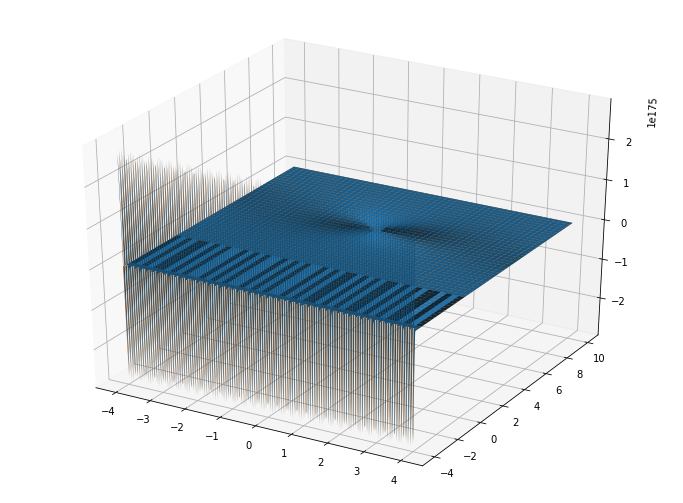

In [81]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[12,9])
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Re, Im, funcIm)
ax.plot_surface(Re, Im, funcRe)
plt.show()

In [82]:
for j in range(len(P_n)):
    if P_n[j]>np.pi:
        P_n[j]-=2*np.pi
P_plot=np.linspace(-np.pi, np.pi, 500)
ED1=EDoublon[:int(L/2)]
ED2=EDoublon[int(L/2):]
ED=np.concatenate((ED1, ED2), axis=None)
ES1=EScatt[:int(L/2), :]
ES2=EScatt[int(L/2):, :]
ES=np.concatenate((ES1, ES2), axis=0)



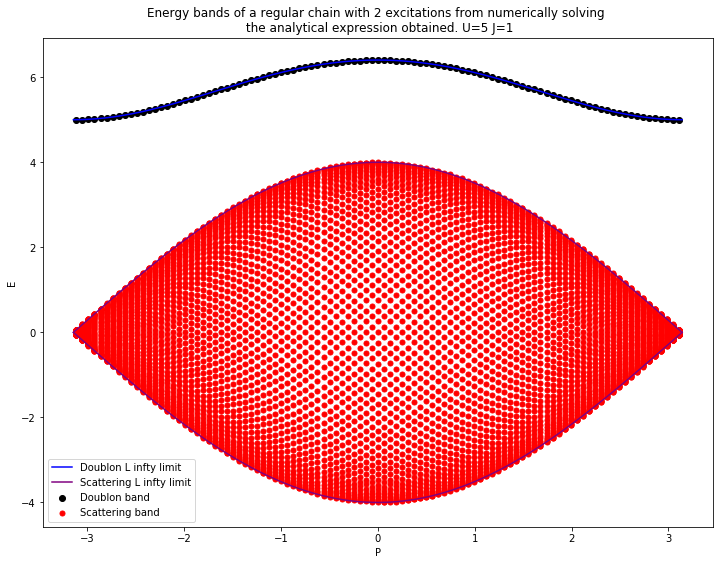

In [83]:
plt.figure(figsize=[12,9])
plt.scatter(P_n, ED, color='black', label='Doublon band')
plt.scatter(P_n, ES[:, 0], color='red', s=25, label='Scattering band')
for i in range(1,int(L/2)): 
    plt.scatter(P_n, ES[:, i], color='red', s=25)
plt.plot(P_plot, np.sqrt(U**2+4*(2*J*np.cos(P_plot/2))**2), label='Doublon L infty limit', color='blue')
plt.plot(P_plot, -4*np.cos(P_plot/2), color='purple', label='Scattering L infty limit')
plt.plot(P_plot, 4*np.cos(P_plot/2), color='purple')
plt.xlabel("P")
plt.ylabel("E")
plt.title("Energy bands of a regular chain with 2 excitations from numerically solving \n the analytical expression obtained. U="+str(U)+" J="+str(J))
plt.legend()
plt.show()

In [84]:
print(np.argsort(EDoublon))

[ 50  49  48  51  52  47  46  53  45  54  55  44  56  43  57  42  58  41
  59  40  39  60  61  38  62  37  36  63  35  64  65  34  66  33  32  67
  68  31  69  30  70  29  71  28  27  72  73  26  25  74  24  75  76  23
  22  77  78  21  79  20  80  19  18  81  17  82  16  83  15  84  85  14
  13  86  12  87  11  88  10  89  90   9  91   8   7  92   6  93  94   5
  95   4  96   3   2  97   1  98   0  99 100]


(101,)
(5050,)
(231,) (5151,)


ValueError: x and y must be the same size

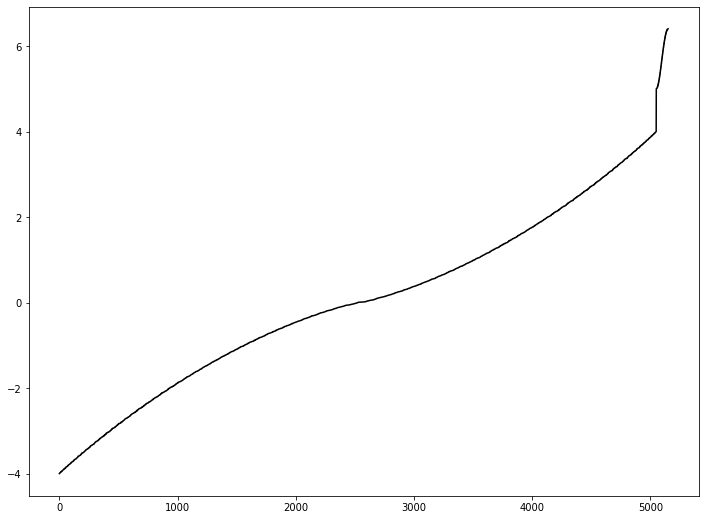

In [85]:
Numerics=np.loadtxt('energies.txt')
print(EDoublon.shape)
ESc=EScatt.ravel()
print(ESc.shape)
ESc=np.concatenate((ESc, EDoublon), axis=None)
idx=np.argsort(ESc)
ESc=ESc[idx]
n=np.arange(0, len(ESc), 1)
#print(ESc)
print(Numerics.shape, n.shape)
plt.figure(figsize=[12,9])
plt.plot(n, ESc, color='black', label='Solution from Bethe Ansatz')
plt.scatter(n, Numerics, color='red', label='Numerical Code')
plt.xlabel('Number of eigenvalue')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [ ]:
def index(i, j, N):
    if i==N:
        i=0
    if i==-1:
        i=N-1
    if j==N:
        j=0
    if j==-1:
        j=N-1
    return i*N+j

In [ ]:
N=L
counter=0
NumericalHamiltonian=np.zeros((N**2, N**2))
base=np.zeros
for j in range(N):
    for k in range(N):
        NumericalHamiltonian[index(j, k, N), index(j+1, k, N)]+=-J
        NumericalHamiltonian[index(j, k, N), index(j-1, k, N)]+=-J
        NumericalHamiltonian[index(j, k, N), index(j, k+1, N)]+=-J
        NumericalHamiltonian[index(j, k, N), index(j, k-1, N)]+=-J
        if j==k:
            NumericalHamiltonian[index(j, k, N), index(j, k, N)]+=U
print(NumericalHamiltonian)
eigval, eigvect=np.linalg.eig(NumericalHamiltonian)
for i in range(N**2):
    print(eigval[i],eigvect[:, i], "\n")

In [ ]:
#[-1.31662479, -1.31662479,  0.29843788,  5.31662479, 5.31662479,  6.70156212] Positive J
eigvalNumerics=[-3.        ,  0.55051026,  0.55051026,  5.44948974,  5.44948974,  6.        ]
plt.figure(figsize=[12, 9])
plt.hlines(eigval, -1, 0, label="Big Hamiltonian", color='blue')
plt.hlines(eigvalNumerics, 0, 1, label='Code', color='red')
plt.hlines(EScatt[:, 0], 1, 2, label='Bethe equation Scattering', color='green')
plt.hlines(EDoublon, 1, 2, color='purple', label='Bethe equation Doublons')
plt.legend()
plt.ylabel("E")
plt.show()